In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the data from the Excel file
df = pd.read_csv('data/count_encode_vanillate_total.csv')


RANDOM FOREST FEATURE IMPORTANCE

Features used: ['YMR113W', 'YBR084W', 'YGR204W', 'YNL256W', 'YJR060W', 'YER043C', 'YGL062W', 'YFR030W', 'YBR294W', 'YAL044C', 'YPR167C', 'YOR184W', 'YFL018C', 'YOR241W', 'YPL262W', 'YPL061W', 'YIR017C', 'YEL046C', 'YKR097W', 'YCL064C', 'OMT', 'YLR058C', 'YJR105W', 'REF', 'YNL103W', 'YGR208W', 'YER065C', 'YOR388C', 'YMR189W', 'YDR019C', 'YER081W', 'YKL029C', 'YNL241C', 'YGL125W', 'YLR303W', 'YGL243W', 'YDR502C', 'YFL030W', 'YHR163W', 'YJR137C', 'YJR010W', 'YLR092W', 'YKL001C', 'YGR267C', 'YER091C']
Samples: 432

Random Forest Performance:
Mean RMSE (5-fold CV): 1048.8778 (+/- 162.1857)
R² Score on full data: 0.0745

Feature Importance Ranking:
    Feature  Importance
21  YLR058C    0.072852
33  YGL125W    0.066312
22  YJR105W    0.060031
31  YKL029C    0.055905
20      OMT    0.055256
28  YMR189W    0.048922
36  YDR502C    0.047827
35  YGL243W    0.038986
25  YGR208W    0.037642
4   YJR060W    0.037614
24  YNL103W    0.034627
30  YER081W    0.032330
13

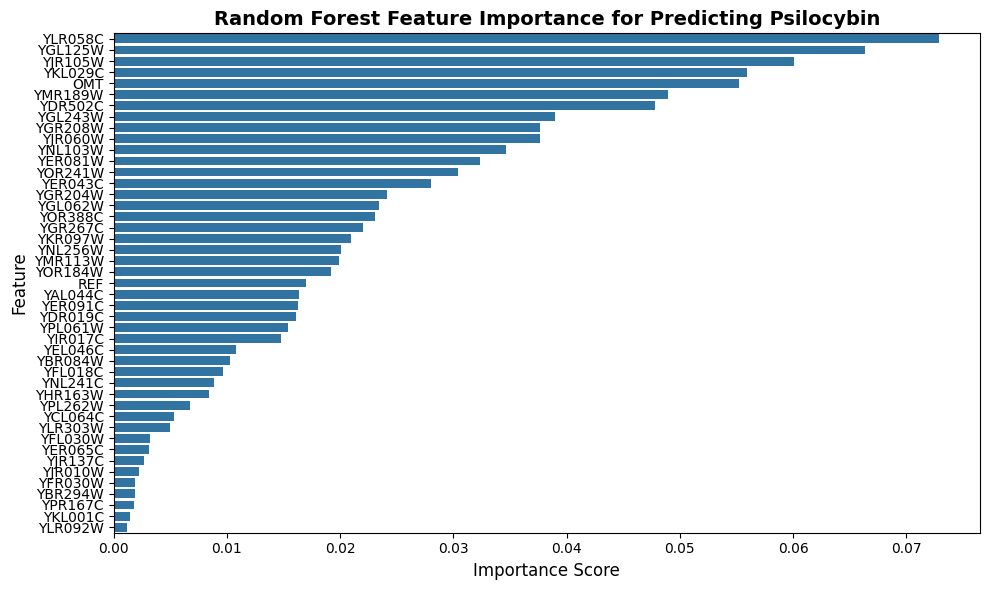

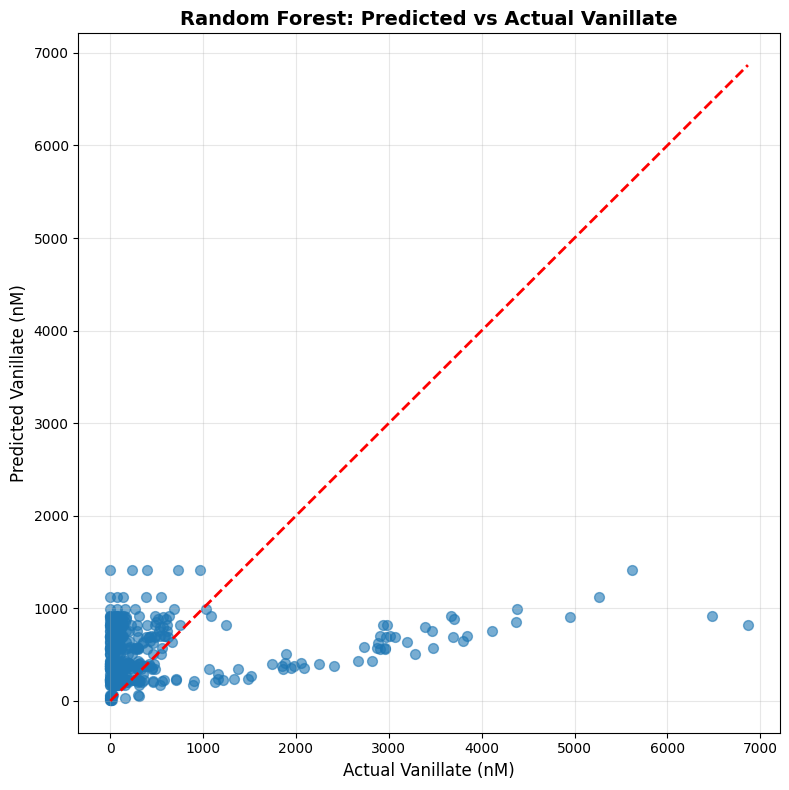

In [23]:
# ============================================================================
# RANDOM FOREST FEATURE IMPORTANCE ANALYSIS
# ============================================================================

print("\n" + "="*80)
print("RANDOM FOREST FEATURE IMPORTANCE")
print("="*80)

feature_cols = df.columns[:-1].tolist()

#specify the feature column(x) and target column(y)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


print(f"\nFeatures used: {feature_cols}")
print(f"Samples: {len(X)}")

# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=1000, max_depth=None, 
                                  random_state=42, n_jobs=-1)
rf_model.fit(X, y)

# Cross-validation score
cv_scores = cross_val_score(rf_model, X, y, cv=5, 
                            scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-cv_scores)

print(f"\nRandom Forest Performance:")
print(f"Mean RMSE (5-fold CV): {rmse_scores.mean():.4f} (+/- {rmse_scores.std():.4f})")
print(f"R² Score on full data: {rf_model.score(X, y):.4f}")

# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance Ranking:")
print(feature_importance)

# Plot Feature Importance
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature', ax=ax)
ax.set_title('Random Forest Feature Importance for Predicting Psilocybin', 
             fontsize=14, fontweight='bold')
ax.set_xlabel('Importance Score', fontsize=12)
ax.set_ylabel('Feature', fontsize=12)
plt.tight_layout()
#plt.savefig('rf_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

# Predicted vs Actual
y_pred = rf_model.predict(X)
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(y, y_pred, alpha=0.6, s=50)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
ax.set_xlabel('Actual Vanillate (nM)', fontsize=12)
ax.set_ylabel('Predicted Vanillate (nM)', fontsize=12)
ax.set_title('Random Forest: Predicted vs Actual Vanillate', 
             fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
plt.tight_layout()
#plt.savefig('rf_pred_vs_actual.png', dpi=300, bbox_inches='tight')
plt.show()

c:\Users\uqkmuroi\gitcode\EnzymeKineticGPR\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



Dataset shape: (432, 45)
Features after low-variance filter: 45 → 45

Top 30 features by mutual information:
YMR189W    0.039035
YAL044C    0.027670
YJR060W    0.027388
YJR105W    0.024165
YBR084W    0.023339
YNL103W    0.022749
YFR030W    0.018665
OMT        0.016644
YGR267C    0.016411
YGL062W    0.015203
YFL030W    0.011851
YER065C    0.009904
YNL256W    0.008575
YGR204W    0.008066
REF        0.007224
YOR388C    0.006936
YER091C    0.006512
YFL018C    0.005994
YER081W    0.005337
YGL125W    0.003263
YLR092W    0.003238
YDR019C    0.001503
YJR137C    0.000396
YOR184W    0.000000
YBR294W    0.000000
YMR113W    0.000000
YPR167C    0.000000
YER043C    0.000000
YOR241W    0.000000
YGR208W    0.000000
dtype: float64

Random Forest Performance:
  R² (full data): 0.0561
  5-fold CV RMSE: 1029.9072
  OOB R²: -0.1240

Computing SHAP values...


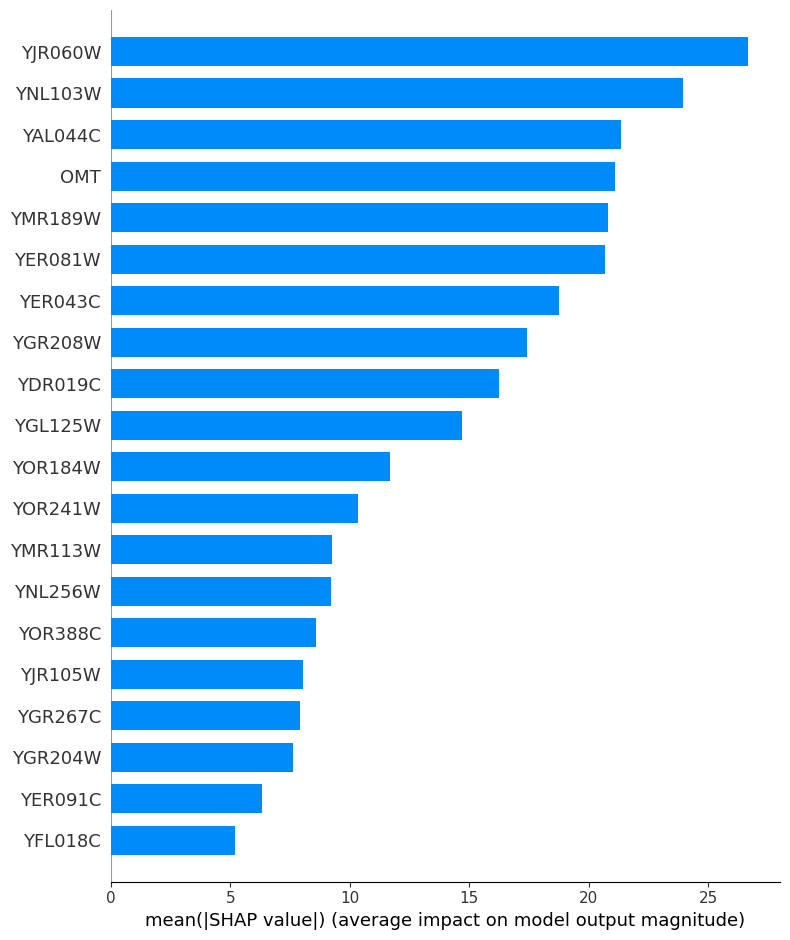

C:\Users\uqkmuroi\AppData\Local\Temp\ipykernel_21312\1867301539.py:100: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=melted[melted['Expression'] > 0],


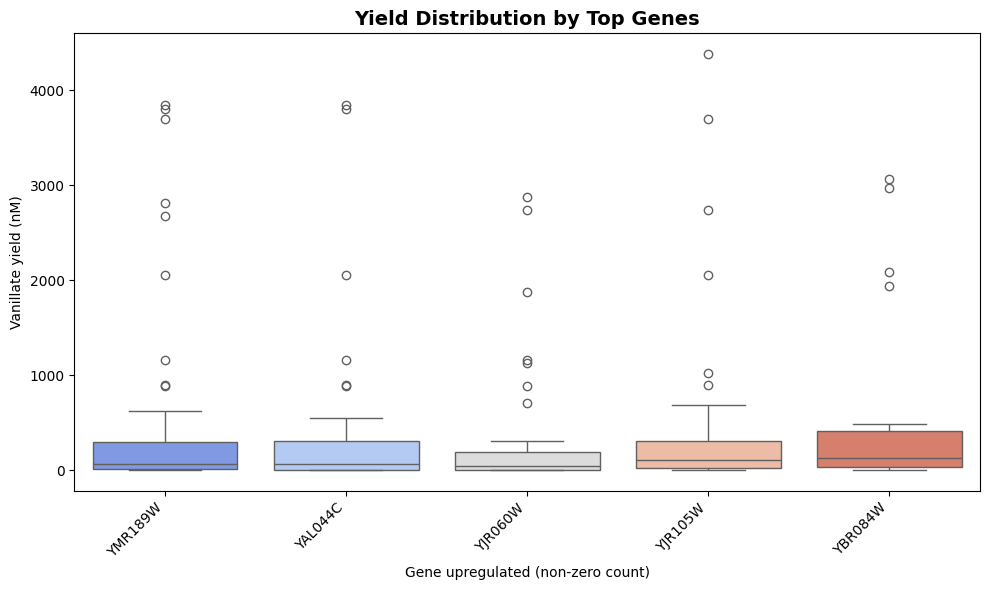

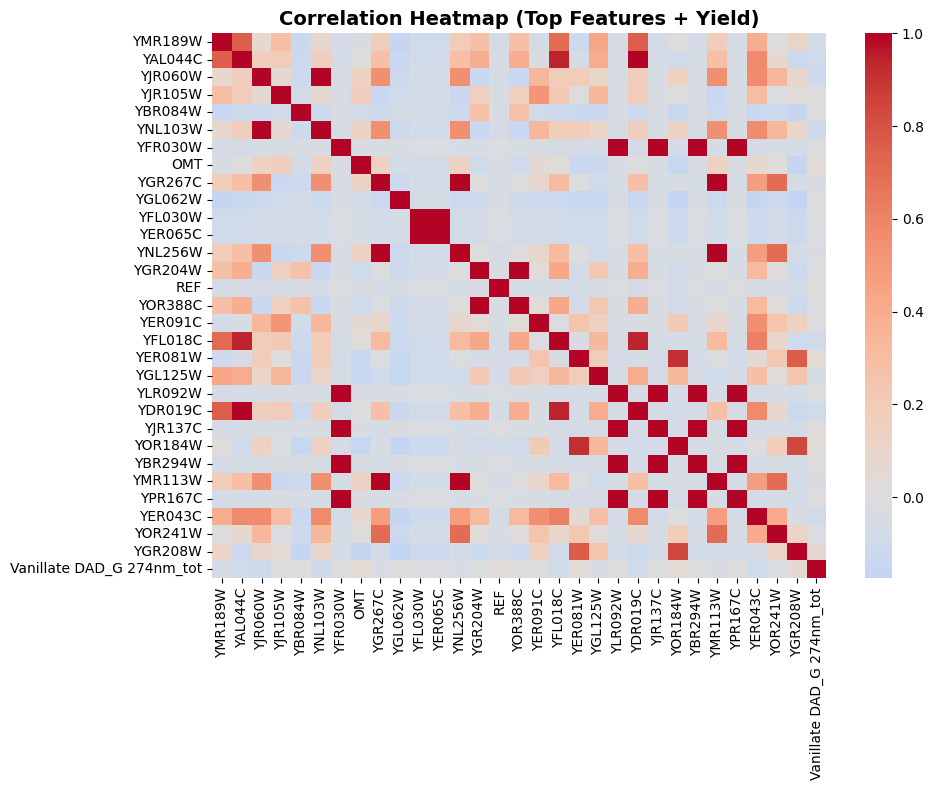


Pipeline complete.


In [25]:
# ============================================================================
# SPARSE GENOTYPE → VANILLATE YIELD PIPELINE
# Low-variance filter + MI selection + Random Forest + SHAP
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold, mutual_info_regression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import shap

# ----------------------------------------------------------------------------
# 1. Load data
# ----------------------------------------------------------------------------
# df = pd.read_csv("your_file.csv")  # Replace with your CSV path
target_col = 'Vanillate DAD_G 274nm_tot'
feature_cols = [c for c in df.columns if c != target_col]

X = df[feature_cols].values
y = df[target_col].values

print("\nDataset shape:", X.shape)

# ----------------------------------------------------------------------------
# 2. Filter low-variance features
# ----------------------------------------------------------------------------
# Keep features where at least 1% of samples vary
var_selector = VarianceThreshold(threshold=0.01)
X_var = var_selector.fit_transform(X)
feature_cols_var = [f for i, f in enumerate(feature_cols) if var_selector.get_support()[i]]

print(f"Features after low-variance filter: {len(feature_cols_var)} → {X_var.shape[1]}")

# ----------------------------------------------------------------------------
# 3. Mutual Information feature selection
# ----------------------------------------------------------------------------
mi = mutual_info_regression(X_var, y, random_state=42)
mi_scores = pd.Series(mi, index=feature_cols_var).sort_values(ascending=False)

top_n = min(30, len(mi_scores))  # select top 30 features
top_features = mi_scores.head(top_n).index.tolist()
X_top = df[top_features].values

print(f"\nTop {top_n} features by mutual information:")
print(mi_scores.head(top_n))

# ----------------------------------------------------------------------------
# 4. Scale features (important for RF stability in sparse data)
# ----------------------------------------------------------------------------
scaler = StandardScaler(with_mean=False)
X_scaled = scaler.fit_transform(X_top)

# ----------------------------------------------------------------------------
# 5. Train Random Forest with tuned hyperparameters
# ----------------------------------------------------------------------------
rf_model = RandomForestRegressor(
    n_estimators=500,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=3,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1,
    oob_score=True
)
rf_model.fit(X_scaled, y)

# Evaluate
cv_rmse = np.sqrt(-cross_val_score(rf_model, X_scaled, y,
                                   cv=5,
                                   scoring='neg_mean_squared_error').mean())
r2_full = rf_model.score(X_scaled, y)
print(f"\nRandom Forest Performance:")
print(f"  R² (full data): {r2_full:.4f}")
print(f"  5-fold CV RMSE: {cv_rmse:.4f}")
print(f"  OOB R²: {rf_model.oob_score_:.4f}")

# ----------------------------------------------------------------------------
# 6. SHAP analysis for feature importance
# ----------------------------------------------------------------------------
print("\nComputing SHAP values...")
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_scaled)

shap.summary_plot(shap_values, X_scaled, feature_names=top_features, plot_type='bar')

# ----------------------------------------------------------------------------
# 7. Plot top genes vs yield
# ----------------------------------------------------------------------------
top_plot_genes = top_features[:5]  # top 5 MI features
melted = df.melt(id_vars=target_col, value_vars=top_plot_genes,
                 var_name='Gene', value_name='Expression')

plt.figure(figsize=(10, 6))
sns.boxplot(data=melted[melted['Expression'] > 0],
            x='Gene', y=target_col, palette='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.title("Yield Distribution by Top Genes", fontsize=14, fontweight='bold')
plt.ylabel("Vanillate yield (nM)")
plt.xlabel("Gene upregulated (non-zero count)")
plt.tight_layout()
plt.show()

# ----------------------------------------------------------------------------
# 8. Optional: Correlation heatmap of top features + target
# ----------------------------------------------------------------------------
corr = df[top_features + [target_col]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', center=0, annot=False)
plt.title("Correlation Heatmap (Top Features + Yield)", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nPipeline complete.")
